In [1]:
import npc_sessions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
session = npc_sessions.Session('668759_20230711')

In [3]:
spike_times = session.spike_times
units_electrodes = session.units_electrodes

C:\Users\arjun.sridhar\source\repos\npc_lims\src\npc_lims\metadata\codeocean.py:121: UserWarning: There is more than one asset for session = '668759_2023-07-11'. Defaulting to most recent: ('ecephys_668759_2023-07-11_13-07-32_units_with_peak_channels', 'ecephys_668759_2023-07-11_13-07-32_units_with_peak_channels', 'ecephys_668759_2023-07-11_13-07-32_units_with_peak_channels', 'ecephys_668759_2023-07-11_13-07-32_units_with_peak_channels', 'ecephys_668759_2023-07-11_13-07-32_units_with_peak_channels')
  warnings.warn(


In [4]:
units_electrodes.columns

Index(['id', 'unit_name', 'drift_mad', 'rp_violations', 'amplitude_cutoff',
       'drift_std', 'firing_rate', 'ks_unit_id', 'peak_to_valley',
       'sliding_rp_violation', 'recovery_slope', 'drift_ptp',
       'peak_trough_ratio', 'device_name', 'num_spikes', 'd_prime', 'snr',
       'repolarization_slope', 'presence_ratio', 'isolation_distance',
       'amplitude', 'l_ratio', 'isi_violations_ratio', 'half_width',
       'default_qc', 'rp_contamination', 'peak_channel', 'AP', 'DV', 'ML',
       'structure_acronym', 'probe_vertical_position',
       'probe_horizontal_position'],
      dtype='object')

In [5]:
spike_times

{'0121e9ad-81c1-43f4-81f7-253d11131414': array([  19.97747611,   19.98210943,   19.99224275, ..., 4780.07295401,
        4780.38778676, 4780.51088653]),
 'bbc7e352-4273-4f77-9758-16149acf98ff': array([  21.29117367,   35.99571309,   36.00151308, ..., 4758.08736142,
        4772.90820062, 4773.38156641]),
 'c31b8f63-400e-4912-a93f-dd03bcf7c498': array([  19.92930953,   20.05864262,   20.08040925, ..., 4786.78504157,
        4787.42647371, 4787.49890691]),
 '13b2edec-5e27-4238-9e11-30d22a2f0a39': array([  20.80317458,   20.82200788,   23.02093713, ..., 4783.0108819 ,
        4783.17861492, 4783.9248802 ]),
 '9a0b7063-159a-48ff-9ab4-298fde05342c': array([  21.17687389,   22.13020545,   22.13237211, ..., 4784.26544624,
        4785.21307781, 4785.42787742]),
 'd22094b7-1885-4891-a30e-1957db202e2c': array([  22.47863814,   22.48847145,   22.63860451, ..., 4782.1465835 ,
        4782.72984908, 4785.72367687]),
 'f8ba9d8f-bfc3-4070-a0d6-a55bed31fc7c': array([  39.67923959,  395.3367471 ,  878

In [7]:
spike_times['0121e9ad-81c1-43f4-81f7-253d11131414'][-1]/60.

79.67518144214723

In [8]:
from scipy.ndimage import gaussian_filter1d
plt.rcParams.update({'font.size': 14})

def plot_metric(data, bins, x_axis_label, color, max_value=-1):
    
    h, b = np.histogram(data, bins=bins, density=True)

    x = b[:-1]
    y = gaussian_filter1d(h, 1)

    plt.plot(x, y, color=color)
    plt.xlabel(x_axis_label)
    plt.gca().get_yaxis().set_visible(False)
    [plt.gca().spines[loc].set_visible(False) for loc in ['right', 'top', 'left']]
    if max_value < np.max(y) * 1.1:
        max_value = np.max(y) * 1.1
    plt.ylim([0, max_value])
    
    return max_value

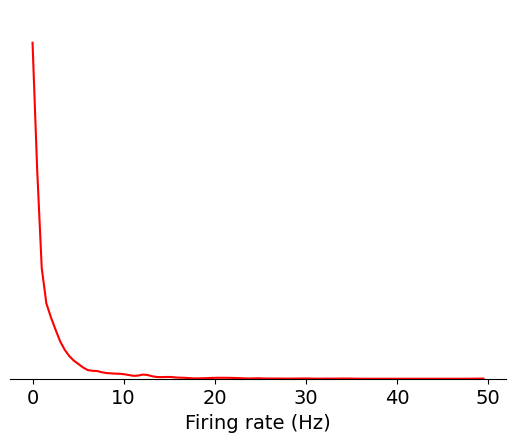

In [9]:
data = units['firing_rate']
bins = np.linspace(0,50,100)

max_value = plot_metric(data, bins, 'Firing rate (Hz)', 'red')

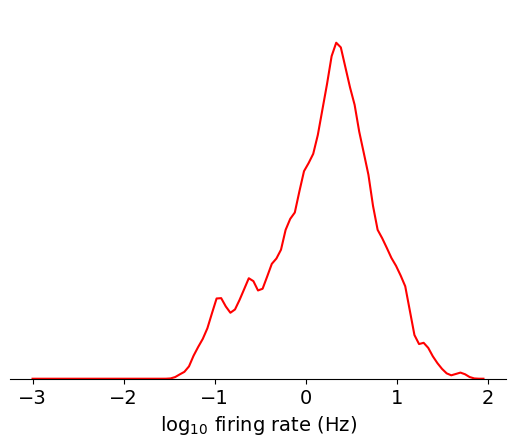

In [10]:
data = np.log10(units[units.presence_ratio > 0.9]['firing_rate'])
bins = np.linspace(-3,2,100)

max_value = plot_metric(data, bins, 'log$_{10}$ firing rate (Hz)', 'red')

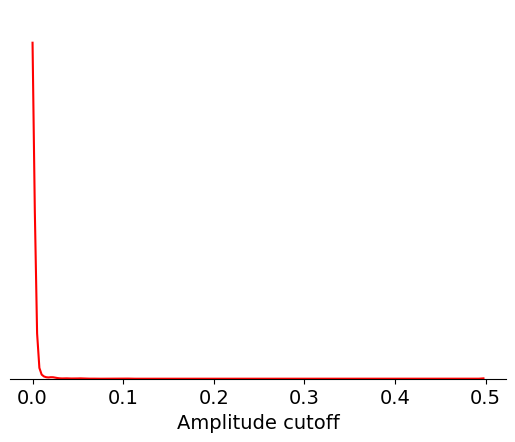

In [11]:
data = units['amplitude_cutoff']
bins = np.linspace(0,0.5,200)
max_value = -np.inf

max_value = plot_metric(data, bins, 'Amplitude cutoff', 'red', max_value=max_value)

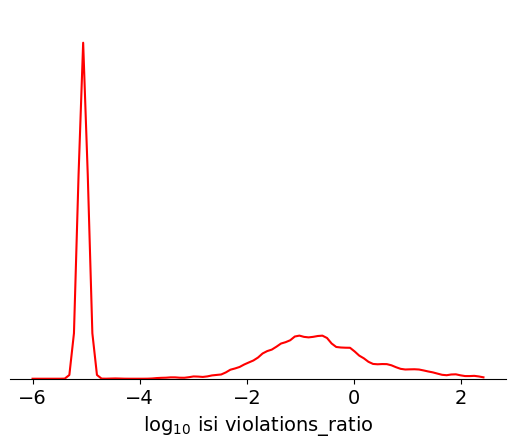

In [12]:
bins = np.linspace(-6,2.5,100)
max_value = -np.inf

data = np.log10(units['isi_violations_ratio'] + 1e-5)
max_value = plot_metric(data, bins, 'log$_{10}$ isi violations_ratio', 'red', max_value=max_value)

In [13]:
units['drift_ptp']

0       9.056649
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2682         NaN
2683         NaN
2684         NaN
2685         NaN
2686         NaN
Name: drift_ptp, Length: 2687, dtype: float64

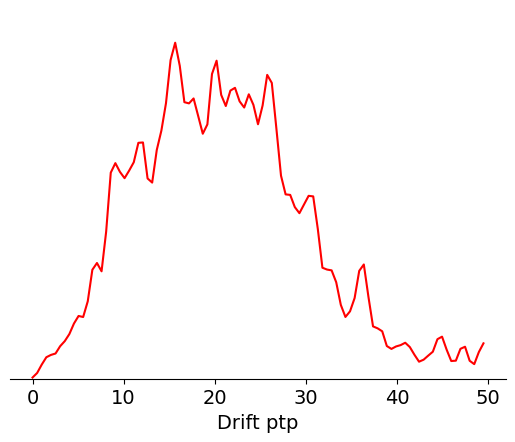

In [14]:
data = units['drift_ptp']
bins = np.linspace(0,50,100)

max_value = plot_metric(data, bins, 'Drift ptp', 'red')

In [16]:
unit_ids = list(spike_times.keys())

Text(0.5, 1.0, 'First 50 Spike Times For Unit 500')

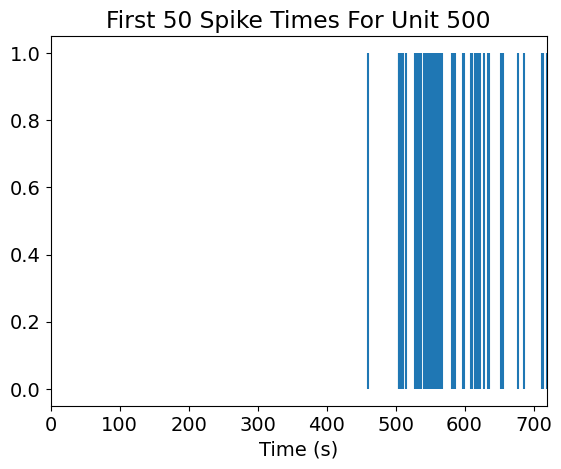

In [17]:
unit_index = 500
spike_times_unit = spike_times[unit_ids[unit_index]][0:50]
fig, ax = plt.subplots()
ax.vlines(spike_times_unit, 0, 1)
ax.set_xlabel('Time (s)')
ax.set_xlim(0, spike_times_unit[-1])
ax.set_title(f'First 50 Spike Times For Unit {unit_index}')